In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

#Sklearn OneHot Encoder to Encode categorical integer features
from sklearn.preprocessing import OneHotEncoder
#Sklearn train_test_split to split a set on train and test 
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
# SVM Classifier from sklearn
from sklearn import svm

In [55]:
#Import the training data set
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
#Construct an X matrix
x_train = data[['Pclass','Sex','Age','Parch','SibSp','Embarked']].copy()
x_test = test[['Pclass','Sex','Age','Parch','SibSp','Embarked']].copy()
x_train.shape, x_test.shape

((891, 6), (418, 6))

In [58]:
PassengerID = np.array(test['PassengerId'])

In [59]:
#Create Y array
y = np.array(data[['Survived']])
print(y.shape)

(891, 1)


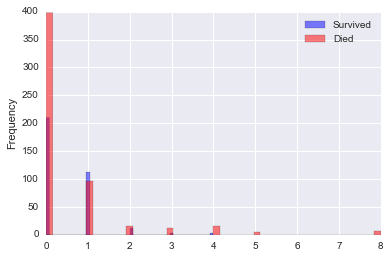

In [60]:
data[data.Survived==1].SibSp.plot.hist(alpha=0.5,color='blue',bins=50)
data[data.Survived==0].SibSp.plot.hist(alpha=0.5,color='red',bins=50)
plt.legend(['Survived','Died'])
plt.show()

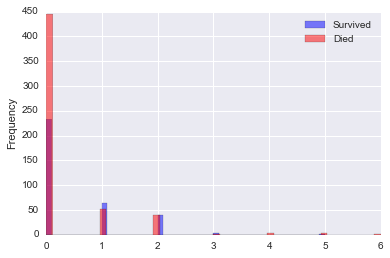

In [61]:
data[data.Survived==1].Parch.plot.hist(alpha=0.5,color='blue',bins=50)
data[data.Survived==0].Parch.plot.hist(alpha=0.5,color='red',bins=50)
plt.legend(['Survived','Died'])
plt.show()

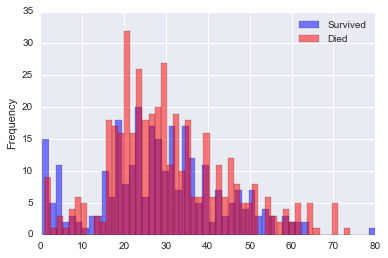

In [62]:
data[data.Survived==1].Age.plot.hist(alpha=0.5,color='blue',bins=50)
data[data.Survived==0].Age.plot.hist(alpha=0.5,color='red',bins=50)
plt.legend(['Survived','Died'])
plt.show()

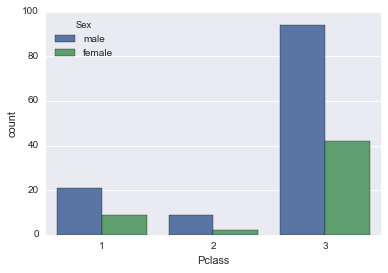

In [63]:
ax1 = sns.countplot(x="Pclass", data=data[data['Age'].isnull()], hue='Sex')

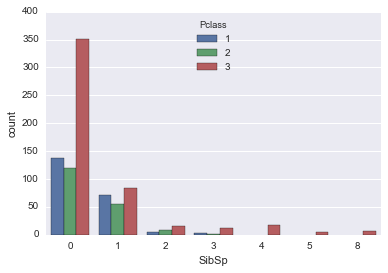

In [64]:
ax2 = sns.countplot(x="SibSp", data=data, hue='Pclass')

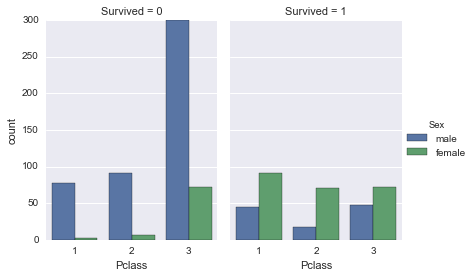

In [65]:
g = sns.factorplot(x="Pclass", hue="Sex", col="Survived",
...                    data=data, kind="count",
...                    size=4, aspect=.7);

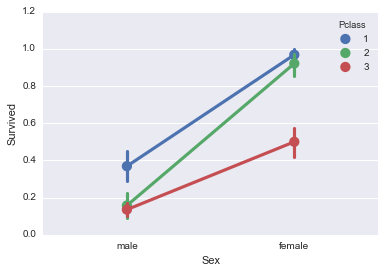

In [66]:
sns.pointplot(x="Sex", y="Survived", hue="Pclass", data=data)

In [67]:
# Work with NaN values
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0,5,16,100]        
label_names = ['Missed',"Infant","Adult","Senior"]

x_train = process_age(x_train,cut_points,label_names)
x_test = process_age(x_test,cut_points,label_names)

In [68]:
# Create a dummies
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

for column in ["Pclass","Sex", 'Embarked', 'Age_categories']:
    x_train = create_dummies(x_train,column)
    x_test = create_dummies(x_test,column)

In [69]:
# Drop the pre-dummies columns 
x_train=x_train.drop(['Pclass','Sex','Age_categories', 'Age', 'SibSp', 'Parch', 'Embarked'], axis=1)
x_test=x_test.drop(['Pclass','Sex','Age_categories', 'Age', 'SibSp', 'Parch', 'Embarked'],axis=1)

In [70]:
#Construct X matrix
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train.shape, x_test.shape

((891, 12), (418, 12))

In [71]:
# The data and task at all has a high value of uncertainty, so lets set test_size=0.5
xn_train, xn_test, yn_train, yn_test = train_test_split(x_train, y, test_size=0.5, random_state=40)
xn_train.shape, xn_test.shape, yn_train.shape, yn_test.shape

((445, 12), (446, 12), (445, 1), (446, 1))

In [72]:
C=np.array([0.3,7,10,12,15,20,70,100])
g=np.array([0.4,0.45,0.5,1,3,5,10,30,100])
CC, gg = np.meshgrid(C,g)
scores = np.zeros(CC.shape)
for i in range (len(scores[:,0])):
    for j in range (len(scores[0,:])):
        svc = svm.SVC(C=CC[i,j], gamma=gg[i,j], probability=True, kernel='rbf')  
        svc.fit(xn_train, yn_train) 
        scores[i,j] = svc.score(xn_test,yn_test)

C:\Roman Kutskyi\Anaconda\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
C:\Roman Kutskyi\Anaconda\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
C:\Roman Kutskyi\Anaconda\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)
C:\Roman Kutskyi\Anaconda\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

In [73]:
ind = np.unravel_index(np.argmax(scores, axis=None), scores.shape)
print('max Score = ',scores[ind],'\noptimal gamma = ',gg[ind],'\noptimal C = ', CC[ind])

max Score =  0.825112107623 
optimal gamma =  0.4 
optimal C =  0.3


In [74]:
svc = svm.SVC(C=0.3, gamma=0.4, probability=True, kernel='rbf')  
svc.fit(x_train, y) 
prediciton = svc.predict(x_test)

C:\Roman Kutskyi\Anaconda\lib\site-packages\sklearn\svm\base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


In [75]:
submission_df = {"passengerID": PassengerID,
                 "survived": prediciton}
submission = pd.DataFrame(submission_df)

In [76]:
submission.to_csv("submission.csv",index=False)